In [ ]:
import shap
import pandas as pd
import numpy as np

from pathlib import Path

from xgboost import XGBClassifier

In [16]:
DATA_PATH = Path('..') / 'data'
RAW_DATA_PATH = DATA_PATH / 'raw'
PROCESSED_DATA_PATH = DATA_PATH / 'processed_v3'

MODELS_PATH = Path('..') / 'models'

VAL_SIZE = 5000
TEST_SIZE = 22500

# Load Data

In [24]:
X_train = pd.read_csv(PROCESSED_DATA_PATH / 'X_train.csv')
X_val   = pd.read_csv(PROCESSED_DATA_PATH / 'X_val.csv')
y_train = pd.read_csv(PROCESSED_DATA_PATH / 'y_train.csv')
y_val   = pd.read_csv(PROCESSED_DATA_PATH / 'y_val.csv')
X_test  = pd.read_csv(PROCESSED_DATA_PATH / 'X_test.csv')
y_test  = pd.read_csv(PROCESSED_DATA_PATH / 'y_test.csv')

# X_train_for_shap = X_train.iloc[:VAL_SIZE,:]
# X_val_for_shap = X_val
# X_test_for_shap = X_val

X_train_for_shap = X_train
X_val_for_shap = X_val
X_test_for_shap = X_test

print(len(X_train_for_shap))
print(len(X_val_for_shap))
print(len(X_test_for_shap))

# y_pred_val_xgboost = np.fromfile(PROCESSED_DATA_PATH / 'y_pred_val_xgboost.npy')
# y_pred_test_xgboost = np.fromfile(PROCESSED_DATA_PATH / 'y_pred_test_xgboost.npy')

125972
5000
17543


# Load XGBoost Model

In [25]:
xgboost_model = XGBClassifier()

xgboost_model.load_model(MODELS_PATH / 'xgboost_model.json')

# Shap Tree Explainer

In [26]:
explainer_train = shap.TreeExplainer(xgboost_model, X_train_for_shap)
explainer_test  = shap.TreeExplainer(xgboost_model, X_test_for_shap)
explainer_val   = shap.TreeExplainer(xgboost_model, X_val_for_shap)

In [28]:
shap_values_train = explainer_train.shap_values(X_train_for_shap)
shap_values_test  = explainer_test.shap_values(X_test_for_shap)
shap_values_val   = explainer_val.shap_values(X_val_for_shap)

 97%|=================== | 4855/5000 [00:18<00:00]           

In [32]:
len(shap_values_train)

125972

# Plot Results

In [33]:
shap_values_train.tofile(PROCESSED_DATA_PATH / 'shap_values_train_from_xgboost.npy')
shap_values_test.tofile(PROCESSED_DATA_PATH / 'shap_values_test_from_xgboost.npy')
shap_values_val.tofile(PROCESSED_DATA_PATH / 'shap_values_val_from_xgboost.npy')

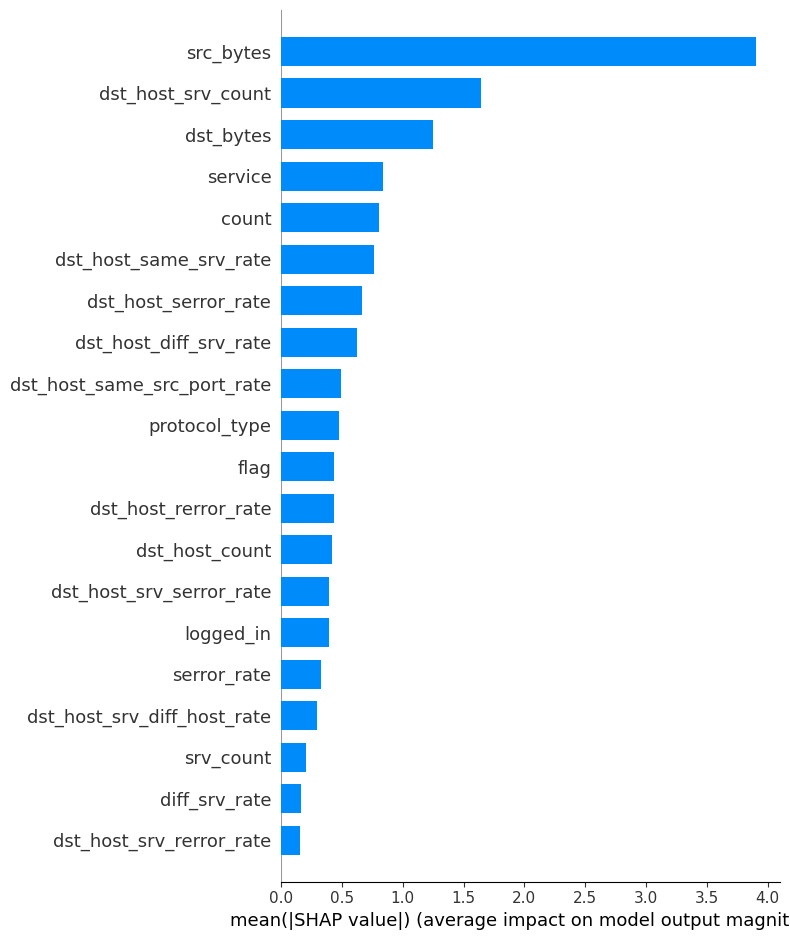

In [30]:
shap.summary_plot(shap_values_train, X_train_for_shap, plot_type='bar')

<AxesSubplot: xlabel='col_name'>

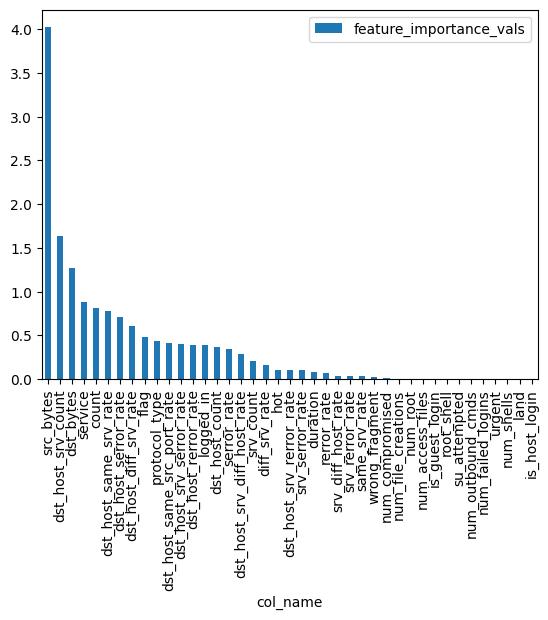

In [10]:
#get top K shap values by importance
feature_names = X_train_for_shap.columns

rf_resultX = pd.DataFrame(shap_values_train, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head(20)

shap_importance.plot(kind='bar', x='col_name', y='feature_importance_vals')


In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# from sklearn import preprocessing


# pca = PCA(n_components=41)

# scaler = preprocessing.StandardScaler()

# shap_values_train_df = pd.DataFrame(shap_values_train)
# y_train_Df = pd.DataFrame(y_train)
# X_train = pd.DataFrame(scaler.fit(shap_values_train_df).transform(shap_values_train_df))


# X_train_PCA = pca.fit_transform(X_train)
# X_train_PCA_df = pd.DataFrame(X_train_PCA)
# y_train_PCA = y_train.iloc[:22500,:]

# colors = {0:'blue', 1:'red'}
# fig, ax = plt.subplots()
# plt.title('PCA on SHAP values')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# ax.scatter(X_train_PCA_df[0], X_train_PCA_df[1], c=y_train_PCA['label'].replace(colors))

In [ ]:
# exp_var_pca = pca.explained_variance_ratio_

# cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
# plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

In [ ]:
# import seaborn as sns

# shap_values_train_df_ = shap_values_train_df.copy()
# shap_values_train_df_['y'] = y_train
# shap_values_train_df_['tsne-2d-one'] = tsne_results[:,0]
# shap_values_train_df_['tsne-2d-two'] = tsne_results[:,1]

# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue='y',
#     palette='muted',
#     data=shap_values_train_df_,
#     legend="full",
#     alpha=0.3
# )